<a href="https://colab.research.google.com/github/ojou10/Deep-Learning-Journey/blob/main/deep_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers , optimizers , datasets , Sequential


In [4]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

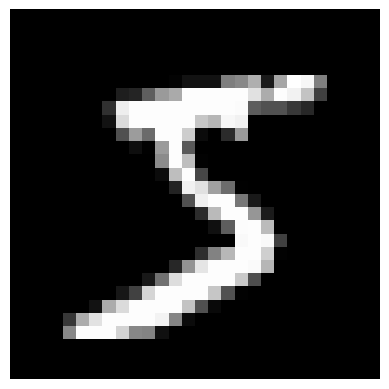

In [13]:
plt.imshow(x_train[0],cmap="gray")
plt.axis("off")

In [7]:
print(y_train[0])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

num_classes = 10
y_train_hot = keras.utils.to_categorical(y_train,num_classes)
y_test_hot = keras.utils.to_categorical(y_test,num_classes)

x_train_hot=x_train.astype('float32')/255
x_test_hot=x_test.astype('float32')/255



5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
model = Sequential()
model.add(layers.Conv2D(6,(3,3),strides= (1,1),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       150,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,006 (593.77 KB)

 Trainable params: 152,006 (593.77 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam' , loss='categorical_crossentropy' , metrics=['accuracy'])


In [10]:
history = model.fit(x_train_hot,y_train_hot , epochs = 10 , batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8542 - loss: 0.5196
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9575 - loss: 0.1428
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9734 - loss: 0.0906
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9802 - loss: 0.0651
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0501
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0414
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0326
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9913 - loss: 0.0291
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9934 - loss: 0.0222
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0172


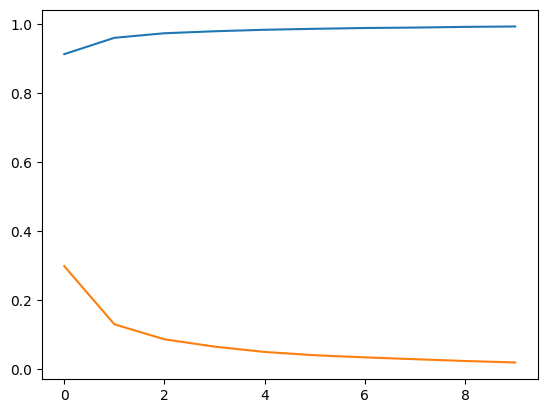

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

In [12]:
history = model.evaluate(x_test_hot,y_test_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9800 - loss: 0.0707
